In [132]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__


'1.10.1'

In [133]:
import os
FOLDER = 'Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['From 2010-2019',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'tmdb_results_combined.csv.gz']

In [134]:
file_list[0]

'From 2010-2019'

In [135]:
FOLDER + file_list[0]

'Data/From 2010-2019'

In [136]:
pd.read_csv(FOLDER + file_list[3])

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,7.00,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,tt8942962,0.0,/gTXCI8ixWjRyll0IwYX4Fk8Mcqe.jpg,NaN,0.0,[],NaN,273575.0,ta,Dosth,...,0.0,0.0,[],Released,NaN,Dost,0.0,3.00,1.0,NaN
4591,tt9071078,0.0,/51274Q2vnmajonyiqq3YNQQ7q4I.jpg,NaN,127389.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://movie.douban.com/subject/26420865/,1044371.0,zh,魔忍狂刀,...,0.0,100.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,Dragon Hero,Dragon Hero,0.0,0.00,0.0,NaN
4592,tt9099724,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,616033.0,ja,6週間プライヴェートモーメント,...,0.0,102.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Rokushukan Private Moment,0.0,0.00,0.0,NaN
4593,tt9212730,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,382630.0,ja,実録外伝 ゾンビ極道,...,0.0,88.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Yakuza Zombie,0.0,0.00,0.0,NaN


In [137]:
import glob
## Make a filepath query
q = 'Data/final*.csv.gz'
file_list = sorted(glob.glob(q))
file_list

['Data\\final_tmdb_data_2000.csv.gz', 'Data\\final_tmdb_data_2001.csv.gz']

In [138]:
# Use glob.glob to get COMPLETE filepaths

q = "Data/**/final*.csv.gz"
file_list = sorted(glob.glob(q,recursive=True))
file_list

['Data\\From 2010-2019\\final_tmdb_data_2010.csv.gz',
 'Data\\From 2010-2019\\final_tmdb_data_2011.csv.gz',
 'Data\\From 2010-2019\\final_tmdb_data_2012.csv.gz',
 'Data\\From 2010-2019\\final_tmdb_data_2013.csv.gz',
 'Data\\From 2010-2019\\final_tmdb_data_2014.csv.gz',
 'Data\\From 2010-2019\\final_tmdb_data_2015.csv.gz',
 'Data\\From 2010-2019\\final_tmdb_data_2016.csv.gz',
 'Data\\From 2010-2019\\final_tmdb_data_2017.csv.gz',
 'Data\\From 2010-2019\\final_tmdb_data_2018.csv.gz',
 'Data\\From 2010-2019\\final_tmdb_data_2019.csv.gz',
 'Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz']

### <h1> Preprocessing

In [141]:
# use a list comprehension to load in all files into 1 dataframe

df = pd.concat([pd.read_csv(f,lineterminator='\n') for f in file_list])
df.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
1,tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,\r
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13\r


In [146]:
# Remove '\r' from all column names
df.columns = df.columns.str.replace('\r', '')

# Remove trailing \r and replace empty strings with NaN in 'certification' column
df['certification'] = df['certification'].str.rstrip('\r').replace('', np.nan)

# Display the DataFrame
print(df.head(30))

      imdb_id  adult                     backdrop_path  \
0           0    NaN                               NaN   
1   tt0312305    0.0  /lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg   
2   tt0326965    0.0  /xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg   
3   tt0331312    0.0                               NaN   
4   tt0393049    0.0  /gc9FN5zohhzCt05RkejQIIPLtBl.jpg   
5   tt0398286    0.0  /cWczNud8Y8i8ab0Z4bxos4myWYO.jpg   
6   tt0403645    0.0  /bQ1vPhjXt2DQetGOJVF1gxzilDD.jpg   
7   tt0411951    0.0  /rbB7g8YBFMLKtmwB8QEvVlKh5Yh.jpg   
8   tt0419692    0.0  /k4pJqDV8cJdOPiZ83bl9K5f90QG.jpg   
9   tt0423474    0.0  /muSdbwHzlwEtam7gdUWmqFYukZb.jpg   
10  tt0427152    0.0  /wyszKdzQylU0i8SI2O8xCce8zLn.jpg   
11  tt0429493    0.0  /puAUfSiVrQO2DPKOobHFjqVcXPt.jpg   
12  tt0435761    0.0  /uAfhsySkr1UzQg1zdg3dZQRz9Fd.jpg   
13  tt0437462    0.0                               NaN   
14  tt0445054    0.0  /1FIyqEY0Vz4GX3YYnyoZJQBnmXL.jpg   
15  tt0446029    0.0  /7zwngyl6Cg4NeD4AIOfpXgrcDv6.jpg   
16  tt0451108 

In [147]:
# remove ids that are 0
df = df.loc[ df['imdb_id']!='0']
df.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.000,1.0,NaN


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43161 entries, 1 to 2338
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                43161 non-null  object 
 1   adult                  43161 non-null  float64
 2   backdrop_path          28095 non-null  object 
 3   belongs_to_collection  2885 non-null   object 
 4   budget                 43161 non-null  float64
 5   genres                 43161 non-null  object 
 6   homepage               10349 non-null  object 
 7   id                     43161 non-null  float64
 8   original_language      43161 non-null  object 
 9   original_title         43161 non-null  object 
 10  overview               42031 non-null  object 
 11  popularity             43161 non-null  float64
 12  poster_path            39935 non-null  object 
 13  production_companies   43161 non-null  object 
 14  production_countries   43161 non-null  object 
 15  rel

In [149]:
if (df == '\\N').any().any():
    print("The dataframe contains '\\N'")
else:
    print("The dataframe does not contain '\\N'")

The dataframe does not contain '\N'


In [150]:
last_column_name = df.columns[-1]

# Display the last column by name
print(df[last_column_name])

1         NaN
2       PG-13
3         NaN
4         NaN
5          PG
        ...  
2334      NaN
2335      NaN
2336      NaN
2337      NaN
2338      NaN
Name: certification, Length: 43161, dtype: object


In [152]:
df.to_csv(FOLDER + 'tmdb_results_combined.csv.gz.csv.gz', compression = 'gzip', index = False)
df = pd.read_csv(FOLDER + 'tmdb_results_combined.csv.gz')

In [153]:
df.head(4)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN


In [154]:
df['certification'].value_counts(dropna = False)

NaN        3754
R           475
PG-13       186
NR           80
PG           68
G            24
NC-17         7
Unrated       1
Name: certification, dtype: int64

In [215]:
df.popularity.drop()

0         NaN
1       2.005
2       1.261
3       1.645
4       1.551
        ...  
4502    1.804
4503    1.267
4504    0.600
4505    1.162
4506    0.600
Name: popularity, Length: 4507, dtype: float64

In [174]:
df = df[~df['certification'].isin(['Unrated', 'NC-17', 'NR'])]

# Resetting index after dropping rows
df.reset_index(drop=True, inplace=True)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,7.00,3.0,NaN


### <h1> Questions to Answer
The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

    - State the Null Hypothesis (Na) - There is no difference between MPAA  rating of a movie affect and how much revenue the movie generates.
    - 
      There is a difference between MPAA ratings affecting how much revenue the movie is generates.

Test to perform is - ANOVA.

In [175]:
result = stats.f_oneway(df['revenue'][df['certification'] == 'G'],
    df['revenue'][df['certification'] == 'PG'],
    df['revenue'][df['certification'] == 'PG-13'],
    df['revenue'][df['certification'] == 'R']
)

In [176]:
print('F-statistic:', result.statistic)
print('P-value:', result.pvalue)

F-statistic: 22.975890471498044
P-value: 3.0925604832949e-14


We are rejecting the null hypothesis that there is no difference between MPAA  rating of a movie affect and how much revenue the movie generates.

<Axes: xlabel='certification', ylabel='revenue'>

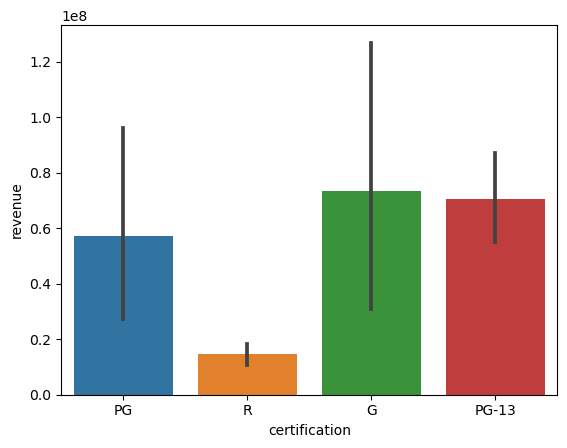

In [177]:
sns.barplot(data=df, x='certification', y='revenue')

In [191]:
# certification with the highest revenue
max_revenue_cert = df.groupby('certification')['revenue'].mean().reset_index()
print("Cerificate with the highest revenue:", max_revenue_cert)

Cerificate with the highest revenue:   certification       revenue
0             G  7.335298e+07
1            PG  5.703335e+07
2         PG-13  7.046296e+07
3             R  1.463024e+07


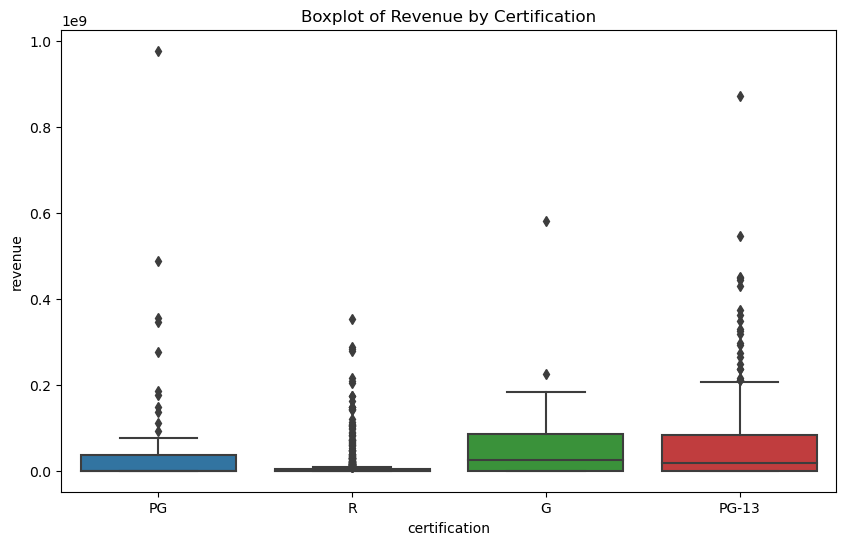

In [193]:
# Boxplot for visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='certification', y='revenue', data=df)
plt.title('Boxplot of Revenue by Certification')
plt.show()

We can conclude that PG-13 and PG movies have a higher budgets compared to other certifications.

### Is adult having an impact on revenue?

Null Hypothesis - There is no significant difference in the average revenue between movies classified as "adult" and those that are not

Alternative Hypothesis - There is a significant difference in the average revenue between movies classified as "adult" and those that are not

In [ ]:
df['production_companies'] = df['production_companies']

In [204]:
# Performing a t-test
result = stats.ttest_ind(df[df['adult'] == 1]['revenue'], df[df['adult'] == 0]['revenue'], equal_var=False)

# Print results
print("T-statistic:", result.statistic)
print("P-value:", result.pvalue)


T-statistic: -10.514837436515776
P-value: 1.4574869603912005e-25


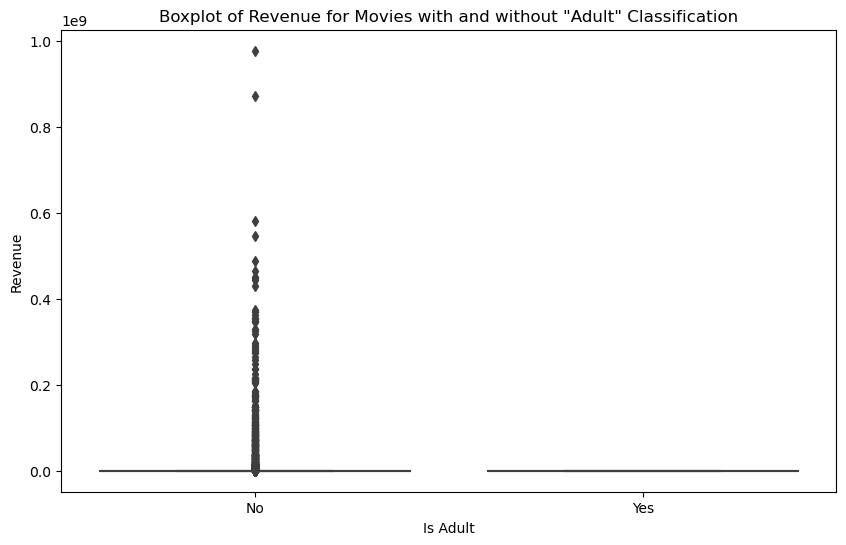

In [205]:
# Boxplot for visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='adult', y='revenue', data=df)
plt.title('Revenue for Movies with and without "Adult" Classification')
plt.xlabel('Is Adult')
plt.ylabel('Revenue')
plt.xticks([0, 1], ['No', 'Yes'])  # Adjusting labels for better readability
plt.show()

We can conclude that There is a significant difference in the average revenue between movies classified as "adult" and those that are not.

Movies withought adults tend to have more revenue than those with adults.

### Is there a correlation between popularity and budget?

Null Hypothesis - There is no significant difference between movies popularity and budget of movies.

Alternative Hypothesis - There is a significant correlation between the popularity and budget of movies.

Test to perform is Pearson Correlation Coefficient

In [220]:
# remove missing values
df.dropna(subset=['popularity', 'budget'], inplace=True)

In [221]:
# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(df['popularity'], df['budget'])

# Print results
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)


Correlation Coefficient: 0.6611211003322257
P-value: 0.0


Correlation Coefficient indicates a positive value, and show that this is a positive linear relationship. As the popularity of a movie increases, the budget also increases.

pvalue - is 0.0, we are rejecting the null value.


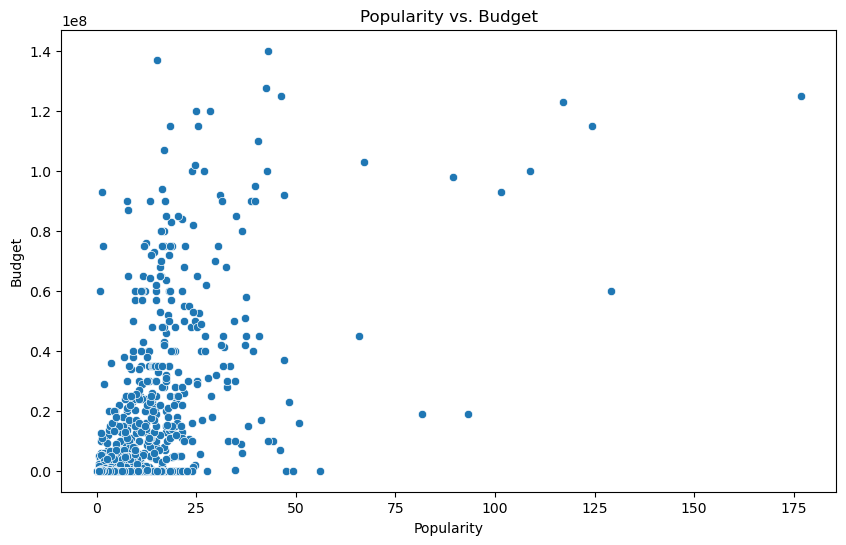

In [222]:
# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='budget', data=df)
plt.title('Popularity vs. Budget')
plt.xlabel('Popularity')
plt.ylabel('Budget')
plt.show()

We can assume that there is a significant correlation between the popularity and budget of movies. If budget increases the Polularity increases.